In [1]:
import geopandas
import shapely
from shapely import Point, LineString, Polygon, MultiPolygon

In [2]:
a = [Point(1,1), Point(5,8), Point(7,20), Point(2,6), Point(1,1)]
a = Polygon(a)
print(a)

POLYGON ((1 1, 5 8, 7 20, 2 6, 1 1))


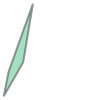

In [3]:
a

In [4]:
xx,yy = a.exterior.coords.xy
coords = a.exterior.coords.xy

In [5]:
x_coords = xx.tolist()
y_coords = yy.tolist()

In [6]:
x_coords 

[1.0, 5.0, 7.0, 2.0, 1.0]

In [7]:
y_coords

[1.0, 8.0, 20.0, 6.0, 1.0]

In [8]:
for i in range(0, len(x_coords)-1):
    coords_start = (x_coords[i], y_coords[i])
    coords_end = (x_coords[-1], y_coords[-1])
    
    if coords_start == coords_end:
        print("It ends with same coordinates")

It ends with same coordinates


In [9]:
def great_circle_dist(phi1,phi2,lam1,lam2):
    phi1 = math.radians(phi1) 
    phi2 = math.radians(phi2)
    lam1 = math.radians(lam1)
    lam2 = math.radians(lam2)
    dl = abs(lam1-lam2) 
    d = math.acos((math.sin(phi1)*math.sin(phi2))+(math.cos(phi1)*math.cos(phi2)*math.cos(dl)))
    spheric_dist = round(d*6300)
    return spheric_dist

In [10]:
import math

for i in range(0, len(x_coords)-1):
    phi1 = x_coords[i] 
    phi2 = x_coords[i+1]
    lam1 = y_coords[i]
    lam2 = y_coords[i+1]
    
    spheric_dist = great_circle_dist(phi1,phi2,lam1,lam2)
    
    print(f"Distance between Point{i} and Point{i+1}: {spheric_dist} Kms")

Distance between Point0 and Point1: 885 Kms
Distance between Point1 and Point2: 1330 Kms
Distance between Point2 and Point3: 1630 Kms
Distance between Point3 and Point4: 560 Kms


In [11]:
import math

def calculate_angle(x1,x2,y1,y2):
    x1 = math.radians(x1) 
    x2 = math.radians(x2)
    y1 = math.radians(y1)
    y2 = math.radians(y2)
    angle = math.atan2(y2 - y1, x2 - x1) * 180 / math.pi
    return angle

In [63]:
for i in range(0, len(x_coords)-1):
    x1 = x_coords[i] 
    x2 = x_coords[i+1]
    y1 = y_coords[i]
    y2 = y_coords[i+1]
    
    angle = calculate_angle(x1,x2,y1,y2)
    
    print(f"Distance between Point{i} and Point{i+1}: {angle} degrees")

Distance between Point0 and Point1: 60.25511870305779 degrees
Distance between Point1 and Point2: 80.53767779197437 degrees
Distance between Point2 and Point3: -109.65382405805333 degrees
Distance between Point3 and Point4: -101.30993247402021 degrees


In [12]:
from shapely import Polygon
ob = MultiPolygon([
    (
    ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)),
    [((0.1,0.1), (0.1,0.2), (0.2,0.2), (0.2,0.1))]
    )
])

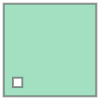

In [13]:
ob

In [35]:
import os
import geopandas as gpd
import pandas as pd

In [41]:
idaho_df = pd.read_csv(r"Vertices_Labels\Idaho_vertices_labels.csv")
idaho_df = idaho_df.drop(columns = ["Unnamed: 0"])
idaho_df.head(2)

Longitude   Latitude case
0 -116.049086  49.000846  yes
1 -116.049087  49.000671   no

In [44]:
idaho_df["len_forward"] = idaho_df.apply(lambda row: length(row), axis = 1)

0 [-116.04908600018396, 49.00084600065112]


In [51]:
def great_circle_dist(phi1,phi2,lam1,lam2):
    phi1 = math.radians(phi1) 
    phi2 = math.radians(phi2)
    lam1 = math.radians(lam1)
    lam2 = math.radians(lam2)
    dl = abs(lam1-lam2) 
    d = math.acos((math.sin(phi1)*math.sin(phi2))+(math.cos(phi1)*math.cos(phi2)*math.cos(dl)))
    spheric_dist = d*6300
    return spheric_dist

In [55]:
list_sphericDist = []
for i in range(len(idaho_df)-1):
    
    phi1 = idaho_df.loc[i, "Longitude"] 
    phi2 = idaho_df.loc[i+1, "Longitude"] 
    lam1 = idaho_df.loc[i, "Latitude"]
    lam2 = idaho_df.loc[i+1, "Latitude"]
    
    spheric_dist = great_circle_dist(phi1,phi2,lam1,lam2)
    
    list_sphericDist.append(spheric_dist)
    print(f"Distance between Point{i} and Point{i+1}: {spheric_dist} Kms")
    

Distance between Point0 and Point1: 0.008451044301992032 Kms
Distance between Point1 and Point2: 0.025301808784943758 Kms
Distance between Point2 and Point3: 0.00840188862455943 Kms
Distance between Point3 and Point4: 0.0018396121715943904 Kms
Distance between Point4 and Point5: 0.005505246254312763 Kms
Distance between Point5 and Point6: 0.0018324120963281718 Kms
Distance between Point6 and Point7: 0.11028678899505644 Kms
Distance between Point7 and Point8: 0.3307161657314808 Kms
Distance between Point8 and Point9: 0.11023919268095864 Kms
Distance between Point9 and Point10: 0.03153146041550154 Kms
Distance between Point10 and Point11: 0.09464239597236412 Kms
Distance between Point11 and Point12: 0.03148335021892093 Kms
Distance between Point12 and Point13: 0.04355421840805091 Kms
Distance between Point13 and Point14: 0.13042123772500708 Kms
Distance between Point14 and Point15: 0.04350633764880016 Kms
Distance between Point15 and Point16: 0.075471172995808 Kms
Distance between Point1

Distance between Point4473 and Point4474: 0.077385662647154 Kms
Distance between Point4474 and Point4475: 0.5970362866706631 Kms
Distance between Point4475 and Point4476: 0.035709183538169535 Kms
Distance between Point4476 and Point4477: 0.025386481335935525 Kms
Distance between Point4477 and Point4478: 0.06888957667172373 Kms
Distance between Point4478 and Point4479: 0.02474214969471314 Kms
Distance between Point4479 and Point4480: 0.019344422597703723 Kms
Distance between Point4480 and Point4481: 0.03758775499462724 Kms
Distance between Point4481 and Point4482: 0.024612691492352234 Kms
Distance between Point4482 and Point4483: 0.023599270871135454 Kms
Distance between Point4483 and Point4484: 0.05648575529977377 Kms
Distance between Point4484 and Point4485: 0.043243217666523 Kms
Distance between Point4485 and Point4486: 0.0355229826824346 Kms
Distance between Point4486 and Point4487: 0.027067941220524302 Kms
Distance between Point4487 and Point4488: 0.032651361673720215 Kms
Distance 

Distance between Point8571 and Point8572: 0.0891540464763857 Kms
Distance between Point8572 and Point8573: 0.027220212882421605 Kms
Distance between Point8573 and Point8574: 0.10054286788563953 Kms
Distance between Point8574 and Point8575: 0.04996663661818117 Kms
Distance between Point8575 and Point8576: 0.03629205227900931 Kms
Distance between Point8576 and Point8577: 0.059552116755058476 Kms
Distance between Point8577 and Point8578: 0.04175050467520566 Kms
Distance between Point8578 and Point8579: 0.05357903346897166 Kms
Distance between Point8579 and Point8580: 0.11166176907182712 Kms
Distance between Point8580 and Point8581: 0.017805040036207375 Kms
Distance between Point8581 and Point8582: 0.07425606645878478 Kms
Distance between Point8582 and Point8583: 0.005605977258029871 Kms
Distance between Point8583 and Point8584: 0.014588486503833584 Kms
Distance between Point8584 and Point8585: 0.07397889855430416 Kms
Distance between Point8585 and Point8586: 0.016974929315920945 Kms
Dista

Distance between Point12716 and Point12717: 0.02918391936680673 Kms
Distance between Point12717 and Point12718: 0.031044874817072157 Kms
Distance between Point12718 and Point12719: 0.1528672101827061 Kms
Distance between Point12719 and Point12720: 0.17539857855871047 Kms
Distance between Point12720 and Point12721: 0.06543161344279778 Kms
Distance between Point12721 and Point12722: 0.0029162470928477645 Kms
Distance between Point12722 and Point12723: 0.004841740181257489 Kms
Distance between Point12723 and Point12724: 0.05571102603875327 Kms
Distance between Point12724 and Point12725: 0.03002577554199405 Kms
Distance between Point12725 and Point12726: 0.04890305359712944 Kms
Distance between Point12726 and Point12727: 0.014791859883836236 Kms
Distance between Point12727 and Point12728: 0.013850642715874164 Kms
Distance between Point12728 and Point12729: 0.007104348440637309 Kms
Distance between Point12729 and Point12730: 0.03209876696460257 Kms
Distance between Point12730 and Point12731

Distance between Point17403 and Point17404: 0.0832100479736614 Kms
Distance between Point17404 and Point17405: 0.05081451703712927 Kms
Distance between Point17405 and Point17406: 0.022265554049575427 Kms
Distance between Point17406 and Point17407: 0.04475418255738373 Kms
Distance between Point17407 and Point17408: 0.07326629814728375 Kms
Distance between Point17408 and Point17409: 0.09049461585016166 Kms
Distance between Point17409 and Point17410: 0.028400021440408655 Kms
Distance between Point17410 and Point17411: 0.06561574426797101 Kms
Distance between Point17411 and Point17412: 0.11864061222899937 Kms
Distance between Point17412 and Point17413: 0.012163906599162673 Kms
Distance between Point17413 and Point17414: 0.03496296746489729 Kms
Distance between Point17414 and Point17415: 0.027609348818994562 Kms
Distance between Point17415 and Point17416: 0.04079139501739079 Kms
Distance between Point17416 and Point17417: 0.08250069667431659 Kms
Distance between Point17417 and Point17418: 0

Distance between Point20199 and Point20200: 0.025149310569422878 Kms
Distance between Point20200 and Point20201: 0.05708165377486912 Kms
Distance between Point20201 and Point20202: 0.0835525512185311 Kms
Distance between Point20202 and Point20203: 0.023999933546758216 Kms
Distance between Point20203 and Point20204: 0.02042042016419888 Kms
Distance between Point20204 and Point20205: 0.07125919016371896 Kms
Distance between Point20205 and Point20206: 0.013220379409361983 Kms
Distance between Point20206 and Point20207: 0.03834218959498865 Kms
Distance between Point20207 and Point20208: 0.0032682251831542028 Kms
Distance between Point20208 and Point20209: 0.00854747673661384 Kms
Distance between Point20209 and Point20210: 0.036201605262024206 Kms
Distance between Point20210 and Point20211: 0.09857748428797518 Kms
Distance between Point20211 and Point20212: 0.0020524595675941695 Kms
Distance between Point20212 and Point20213: 0.02313461639921413 Kms
Distance between Point20213 and Point2021

Distance between Point24151 and Point24152: 0.4679727024465185 Kms
Distance between Point24152 and Point24153: 0.40045980992613295 Kms
Distance between Point24153 and Point24154: 0.14306730406697235 Kms
Distance between Point24154 and Point24155: 0.06751965620744314 Kms
Distance between Point24155 and Point24156: 0.0358494594022499 Kms
Distance between Point24156 and Point24157: 0.0024766536813116053 Kms
Distance between Point24157 and Point24158: 0.0013408362597173466 Kms
Distance between Point24158 and Point24159: 0.1969518784406347 Kms
Distance between Point24159 and Point24160: 0.2344256985709839 Kms
Distance between Point24160 and Point24161: 0.7097646764890388 Kms
Distance between Point24161 and Point24162: 0.7504522778726544 Kms
Distance between Point24162 and Point24163: 0.9692670039311612 Kms
Distance between Point24163 and Point24164: 0.6070656728370236 Kms
Distance between Point24164 and Point24165: 0.16559460858600436 Kms
Distance between Point24165 and Point24166: 0.508658

Distance between Point28613 and Point28614: 0.006874230130067433 Kms
Distance between Point28614 and Point28615: 0.0054884118251882046 Kms
Distance between Point28615 and Point28616: 0.03428360489912014 Kms
Distance between Point28616 and Point28617: 0.016424506409928034 Kms
Distance between Point28617 and Point28618: 0.002853623335584879 Kms
Distance between Point28618 and Point28619: 0.06647448668509863 Kms
Distance between Point28619 and Point28620: 0.03741066972575135 Kms
Distance between Point28620 and Point28621: 0.07244427952386909 Kms
Distance between Point28621 and Point28622: 0.07242566446308489 Kms
Distance between Point28622 and Point28623: 0.03385888119630475 Kms
Distance between Point28623 and Point28624: 0.03396114879986084 Kms
Distance between Point28624 and Point28625: 0.006751339075392854 Kms
Distance between Point28625 and Point28626: 0.002028705947776716 Kms
Distance between Point28626 and Point28627: 0.010572769858766467 Kms
Distance between Point28627 and Point286

Distance between Point31738 and Point31739: 0.010135707299295216 Kms
Distance between Point31739 and Point31740: 0.010022914808660249 Kms
Distance between Point31740 and Point31741: 0.006820172435510038 Kms
Distance between Point31741 and Point31742: 0.0017687841533560462 Kms
Distance between Point31742 and Point31743: 0.0027240602436615895 Kms
Distance between Point31743 and Point31744: 0.0026519303148538325 Kms
Distance between Point31744 and Point31745: 0.0018798917783104689 Kms
Distance between Point31745 and Point31746: 0.006620847010599939 Kms
Distance between Point31746 and Point31747: 0.01011002464809988 Kms
Distance between Point31747 and Point31748: 0.009897714701237787 Kms
Distance between Point31748 and Point31749: 0.006739580565901403 Kms
Distance between Point31749 and Point31750: 0.004935483240902429 Kms
Distance between Point31750 and Point31751: 0.014832912929496764 Kms
Distance between Point31751 and Point31752: 0.00505457645318655 Kms
Distance between Point31752 and 

In [56]:
list_angle = []
for i in range(len(idaho_df)-1):
    
    x1 = idaho_df.loc[i, "Longitude"] 
    x2 = idaho_df.loc[i+1, "Longitude"] 
    y1 = idaho_df.loc[i, "Latitude"]
    y2 = idaho_df.loc[i+1, "Latitude"]
    
    angle = calculate_angle(x1,x2,y1,y2)
    
    list_angle.append(angle)
    
    print(f"Distance between Point{i} and Point{i+1}: {angle} degrees")

Distance between Point0 and Point1: -90.32717918024677 degrees
Distance between Point1 and Point2: -90.00007374434422 degrees
Distance between Point2 and Point3: -89.99998197790045 degrees
Distance between Point3 and Point4: -88.49322601131158 degrees
Distance between Point4 and Point5: -90.50252153804612 degrees
Distance between Point5 and Point6: -89.99973347784241 degrees
Distance between Point6 and Point7: -90.12544060004554 degrees
Distance between Point7 and Point8: -90.13384338143379 degrees
Distance between Point8 and Point9: -90.15059013472417 degrees
Distance between Point9 and Point10: -90.17542314657075 degrees
Distance between Point10 and Point11: -90.14618225969153 degrees
Distance between Point11 and Point12: -90.17573745664177 degrees
Distance between Point12 and Point13: -90.06348491759181 degrees
Distance between Point13 and Point14: -90.06364750403716 degrees
Distance between Point14 and Point15: -90.12716482409637 degrees
Distance between Point15 and Point16: -90.00

Distance between Point4941 and Point4942: 4.634380318736459 degrees
Distance between Point4942 and Point4943: -4.0946278893892805 degrees
Distance between Point4943 and Point4944: -13.823544903271797 degrees
Distance between Point4944 and Point4945: -7.722048382792943 degrees
Distance between Point4945 and Point4946: -7.352181459325435 degrees
Distance between Point4946 and Point4947: -61.037279428074065 degrees
Distance between Point4947 and Point4948: -57.414413817904126 degrees
Distance between Point4948 and Point4949: -79.3150209497335 degrees
Distance between Point4949 and Point4950: -79.22885995917045 degrees
Distance between Point4950 and Point4951: -76.29245623114909 degrees
Distance between Point4951 and Point4952: -76.20436056743983 degrees
Distance between Point4952 and Point4953: -56.227739749508004 degrees
Distance between Point4953 and Point4954: -53.484307365844494 degrees
Distance between Point4954 and Point4955: -42.220854654590276 degrees
Distance between Point4955 an

Distance between Point9397 and Point9398: -131.50891625246075 degrees
Distance between Point9398 and Point9399: -131.8095669001165 degrees
Distance between Point9399 and Point9400: -135.47807892854905 degrees
Distance between Point9400 and Point9401: -143.16074421606672 degrees
Distance between Point9401 and Point9402: -137.68274778889628 degrees
Distance between Point9402 and Point9403: -130.52921426312406 degrees
Distance between Point9403 and Point9404: -130.35061606663385 degrees
Distance between Point9404 and Point9405: -115.09744194326855 degrees
Distance between Point9405 and Point9406: -98.84503943507181 degrees
Distance between Point9406 and Point9407: -98.74590850644805 degrees
Distance between Point9407 and Point9408: -125.66873158040711 degrees
Distance between Point9408 and Point9409: -125.5371443736893 degrees
Distance between Point9409 and Point9410: -157.71442634877332 degrees
Distance between Point9410 and Point9411: -159.46552685792952 degrees
Distance between Point94

Distance between Point13592 and Point13593: -28.906336820015397 degrees
Distance between Point13593 and Point13594: -32.41949960843818 degrees
Distance between Point13594 and Point13595: -31.431689708381356 degrees
Distance between Point13595 and Point13596: -51.46580878414341 degrees
Distance between Point13596 and Point13597: -51.45250192339569 degrees
Distance between Point13597 and Point13598: -47.771798660747315 degrees
Distance between Point13598 and Point13599: -3.910920411739829 degrees
Distance between Point13599 and Point13600: -6.824860512832039 degrees
Distance between Point13600 and Point13601: -13.61072895816777 degrees
Distance between Point13601 and Point13602: -25.726870565211645 degrees
Distance between Point13602 and Point13603: -25.67700702846863 degrees
Distance between Point13603 and Point13604: -25.659264352680623 degrees
Distance between Point13604 and Point13605: -11.311240900194056 degrees
Distance between Point13605 and Point13606: -17.500350122091845 degrees

Distance between Point17333 and Point17334: -43.72750603574173 degrees
Distance between Point17334 and Point17335: -41.25374961246863 degrees
Distance between Point17335 and Point17336: -41.987485656503075 degrees
Distance between Point17336 and Point17337: -36.85321818707943 degrees
Distance between Point17337 and Point17338: -34.76020712119023 degrees
Distance between Point17338 and Point17339: -8.593026137943204 degrees
Distance between Point17339 and Point17340: -8.569072195940402 degrees
Distance between Point17340 and Point17341: 4.023990513149057 degrees
Distance between Point17341 and Point17342: -0.6725023435752594 degrees
Distance between Point17342 and Point17343: 27.341064519711846 degrees
Distance between Point17343 and Point17344: 27.38193489231379 degrees
Distance between Point17344 and Point17345: 20.379792873063916 degrees
Distance between Point17345 and Point17346: 20.376353566827074 degrees
Distance between Point17346 and Point17347: 9.286073038678536 degrees
Distanc

Distance between Point21379 and Point21380: -70.31252056776835 degrees
Distance between Point21380 and Point21381: -70.12859492244993 degrees
Distance between Point21381 and Point21382: -86.0009031041899 degrees
Distance between Point21382 and Point21383: -92.38636402954084 degrees
Distance between Point21383 and Point21384: -105.4218244047057 degrees
Distance between Point21384 and Point21385: -95.13373799621944 degrees
Distance between Point21385 and Point21386: -93.46486445206264 degrees
Distance between Point21386 and Point21387: -90.63774342549695 degrees
Distance between Point21387 and Point21388: -90.60601671900085 degrees
Distance between Point21388 and Point21389: -89.72768294076447 degrees
Distance between Point21389 and Point21390: -89.74916879531895 degrees
Distance between Point21390 and Point21391: -89.74147639884076 degrees
Distance between Point21391 and Point21392: -89.73708084569061 degrees
Distance between Point21392 and Point21393: -89.74641368549952 degrees
Distanc

Distance between Point25419 and Point25420: 109.82841439558557 degrees
Distance between Point25420 and Point25421: 102.47515811909778 degrees
Distance between Point25421 and Point25422: 102.47699430021567 degrees
Distance between Point25422 and Point25423: 102.47736673874648 degrees
Distance between Point25423 and Point25424: 102.48515158443949 degrees
Distance between Point25424 and Point25425: 95.61403407504991 degrees
Distance between Point25425 and Point25426: 89.83274093925459 degrees
Distance between Point25426 and Point25427: 89.25752730280406 degrees
Distance between Point25427 and Point25428: 79.57005313728673 degrees
Distance between Point25428 and Point25429: 98.28007430660338 degrees
Distance between Point25429 and Point25430: 111.3141248224045 degrees
Distance between Point25430 and Point25431: 103.0669206982082 degrees
Distance between Point25431 and Point25432: 95.22632022649694 degrees
Distance between Point25432 and Point25433: 100.86045963556471 degrees
Distance betwe

Distance between Point29213 and Point29214: 35.86730743792816 degrees
Distance between Point29214 and Point29215: 31.60489668994663 degrees
Distance between Point29215 and Point29216: 35.6761281822529 degrees
Distance between Point29216 and Point29217: 39.80592188344868 degrees
Distance between Point29217 and Point29218: 35.24217254825834 degrees
Distance between Point29218 and Point29219: 36.32689297064829 degrees
Distance between Point29219 and Point29220: 35.57737192549899 degrees
Distance between Point29220 and Point29221: 35.95174468447521 degrees
Distance between Point29221 and Point29222: 33.693465341299344 degrees
Distance between Point29222 and Point29223: 35.97150529579386 degrees
Distance between Point29223 and Point29224: 36.872907215590395 degrees
Distance between Point29224 and Point29225: 35.53651566841354 degrees
Distance between Point29225 and Point29226: 25.500774083546034 degrees
Distance between Point29226 and Point29227: 25.56665016077444 degrees
Distance between P

Distance between Point32718 and Point32719: 89.99929130190813 degrees
Distance between Point32719 and Point32720: 90.00048412335144 degrees
Distance between Point32720 and Point32721: 90.00025280531901 degrees
Distance between Point32721 and Point32722: 89.68210435967777 degrees
Distance between Point32722 and Point32723: 89.7545149398616 degrees
Distance between Point32723 and Point32724: 90.0001327469626 degrees
Distance between Point32724 and Point32725: 88.86589768115857 degrees
Distance between Point32725 and Point32726: 90.44737982449796 degrees
Distance between Point32726 and Point32727: 89.6411510487054 degrees
Distance between Point32727 and Point32728: 90.72520864137323 degrees
Distance between Point32728 and Point32729: 89.34058628220176 degrees
Distance between Point32729 and Point32730: 90.28283662257809 degrees
Distance between Point32730 and Point32731: 90.13898314418115 degrees
Distance between Point32731 and Point32732: 88.75466233573516 degrees
Distance between Point3

In [58]:
len(list_sphericDist)

35241

In [59]:
len(idaho_df)

35242